In [1]:
"""
    Import modules
"""
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
    Declare constants
"""
CSV_PATH = "../data/raw/airbnb.csv"
FIGURES_FOLDER = "../reports/figures/exploratory_analisys/"

In [3]:
raw_df = pd.read_csv(CSV_PATH)
print("En total hay {} celdas con valores NaN y {} celdas con valores null.".format(raw_df.isna().sum().sum(), raw_df.isnull().sum().sum()))
raw_df.head()

En total hay 0 celdas con valores NaN y 0 celdas con valores null.


neighbourhood_group  neighbourhood   latitude  longitude        room_type  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
0              Centro       Justicia  40.424715  -3.698638  Entire home/apt     49              28                 35               0.42                               1                99
1              Centro    Embajadores  40.413418  -3.706838  Entire home/apt     80               5                 18               0.30                               1               188
2   Moncloa - Aravaca      Argüelles  40.424920  -3.713446  Entire home/apt     40               2                 21               0.25                               9               195
3   Moncloa - Aravaca  Casa de Campo  40.431027  -3.724586  Entire home/apt     55               2                  3               0.13                               9               334
4              Latina       Cármenes  40.403410  -3.740842     Private room     16               2                 23               0.76                               2               250

La ingeniería de características incluye la limpieza de los datos y la modificación de éstos para facilitar el entrenamiento. El objetivo de este notebook es ver qué datos eliminar y qué transformaciones se podrían usar en las funciones y poder crear un script de pipelines.

#### neighbourhood

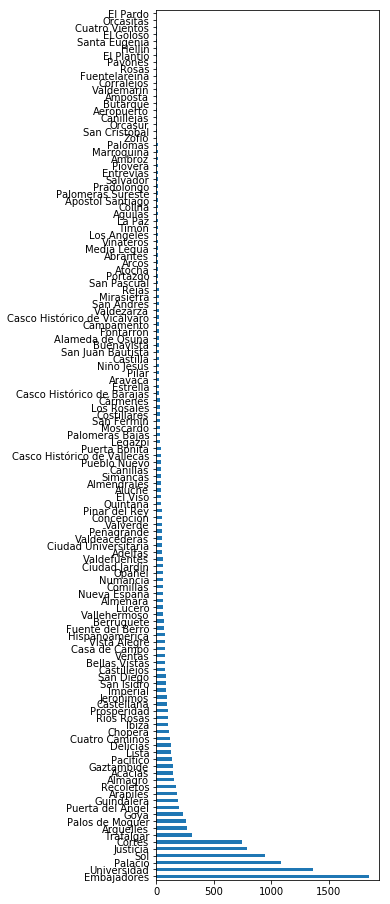

In [4]:
raw_df["neighbourhood"].value_counts().plot(kind="barh", figsize=(4, 16))

La transformación que se puede hacer es codificar las nombres a variables *dummies*. Se crean n-1 columnas llamadas neighbourhood_{nombre del barrio}, siendo n el número total de barrios. Hay barrios que tienen muy pocos alojamientos y que puede que no aporten nada al modelo de aprendizaje automático que apliquemos.

In [8]:
pd.get_dummies(raw_df, columns=["neighbourhood"], drop_first=False).head()

neighbourhood_group   latitude  longitude        room_type  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365  neighbourhood_Abrantes  neighbourhood_Acacias  neighbourhood_Adelfas  neighbourhood_Aeropuerto  neighbourhood_Aguilas  neighbourhood_Alameda de Osuna  neighbourhood_Almagro  neighbourhood_Almenara  neighbourhood_Almendrales  neighbourhood_Aluche  neighbourhood_Ambroz  neighbourhood_Amposta  neighbourhood_Apostol Santiago  neighbourhood_Arapiles  neighbourhood_Aravaca  neighbourhood_Arcos  neighbourhood_Argüelles  neighbourhood_Atocha  neighbourhood_Bellas Vistas  neighbourhood_Berruguete  neighbourhood_Buenavista  neighbourhood_Butarque  neighbourhood_Campamento  neighbourhood_Canillas  neighbourhood_Canillejas  neighbourhood_Casa de Campo  neighbourhood_Casco Histórico de Barajas  neighbourhood_Casco Histórico de Vallecas  neighbourhood_Casco Histórico de Vicálvaro  neighbourhood_Castellana  \
0              Centro  40.424715  -3.698638  Entire home/apt     49              28                 35               0.42                               1                99                       0                      0                      0                         0                      0                               0                      0                       0                          0                     0                     0                      0                               0                       0                      0                    0                        0                     0                            0                         0                         0                       0                         0                       0                         0                            0                                         0                                          0                                           0                         0   
1              Centro  40.413418  -3.706838  Entire home/apt     80               5                 18               0.30                               1               188                       0                      0                      0                         0                      0                               0                      0                       0                          0                     0                     0                      0                               0                       0                      0                    0                        0                     0                            0                         0                         0                       0                         0                       0                         0                            0                                         0                                          0                                           0                         0   
2   Moncloa - Aravaca  40.424920  -3.713446  Entire home/apt     40               2                 21               0.25                               9               195                       0                      0                      0                         0                      0                               0                      0                       0                          0                     0                     0                      0                               0                       0                      0                    0                        1                     0                            0                         0                         0                       0                         0                       0                         0                            0                                         0                                          0                                           0                         0   
3   Moncloa - Aravaca  40.431027  -3.724586  Entire home/apt     55               2   

#### neighbourhood_group

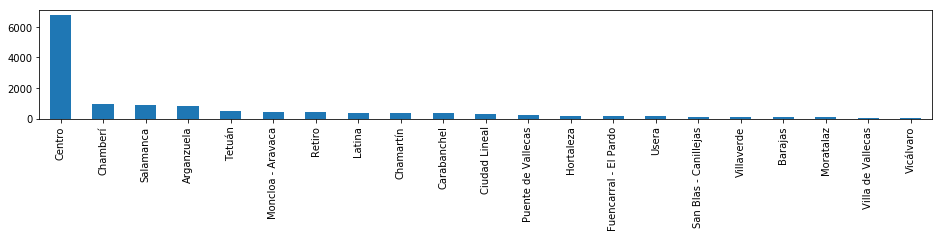

In [12]:
raw_df["neighbourhood_group"].value_counts().plot(kind="bar", figsize=(16, 2))

En este caso ocurre algo similar. La zona centro tiene la gran parte de anuncios de apartamentos.

In [13]:
pd.get_dummies(raw_df, columns=["neighbourhood_group"], drop_first=False).head()

neighbourhood   latitude  longitude        room_type  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365  neighbourhood_group_Arganzuela  neighbourhood_group_Barajas  neighbourhood_group_Carabanchel  neighbourhood_group_Centro  neighbourhood_group_Chamartín  neighbourhood_group_Chamberí  neighbourhood_group_Ciudad Lineal  neighbourhood_group_Fuencarral - El Pardo  neighbourhood_group_Hortaleza  neighbourhood_group_Latina  neighbourhood_group_Moncloa - Aravaca  neighbourhood_group_Moratalaz  neighbourhood_group_Puente de Vallecas  neighbourhood_group_Retiro  neighbourhood_group_Salamanca  neighbourhood_group_San Blas - Canillejas  neighbourhood_group_Tetuán  neighbourhood_group_Usera  neighbourhood_group_Vicálvaro  neighbourhood_group_Villa de Vallecas  neighbourhood_group_Villaverde
0       Justicia  40.424715  -3.698638  Entire home/apt     49              28                 35               0.42                               1                99                               0                            0                                0                           1                              0                             0                                  0                                          0                              0                           0                                      0                              0                                       0                           0                              0                                          0                           0                          0                              0                                      0                               0
1    Embajadores  40.413418  -3.706838  Entire home/apt     80               5                 18               0.30                               1               188                               0                            0                                0                           1                              0                             0                                  0                                          0                              0                           0                                      0                              0                                       0                           0                              0                                          0                           0                          0                              0                                      0                               0
2      Argüelles  40.424920  -3.713446  Entire home/apt     40               2                 21               0.25                               9               195                               0                            0                                0                           0                              0                             0                                  0                                          0                              0                           0                                      1                              0                                       0                           0                              0                                          0                           0                          0                              0                                      0                               0
3  Casa de Campo  40.431027  -3.724586  Entire home/apt     55               2                  3               0.13                               9               334                               0                            0                                0                           0                              0                             0                                  0                                          0                              0                           0                                      1                              0                       

#### latitude y longitude

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bac0a9510>,
      dtype=object)

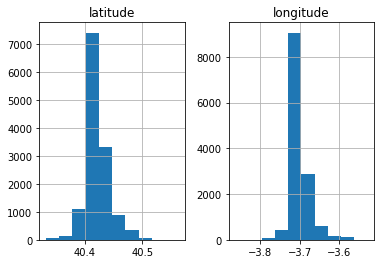

In [16]:
raw_df[["latitude", "longitude"]].hist()

Los rangos de longitud y latitud se distribuyen entorno a 40.42, -3.70, coordenadas del centro de Madrid. No se observan anomalías en los datos. En muchos algoritmos de aprendizaje automático es preferible trabajar con valores entre 0 y 1. Podemos escalar estas dos columnas entre 0 y 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b87ed3310>,
      dtype=object)

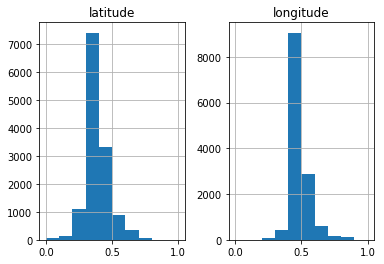

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp_df = raw_df[["latitude", "longitude"]]
pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns).hist()

#### room_type

Room type puede codificarse en dummie o dejarse como está, dependerá del algoritmo.

In [19]:
pd.get_dummies(raw_df, columns=["room_type"], drop_first=False).head()  # dummies


neighbourhood_group  neighbourhood   latitude  longitude  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365  room_type_Entire home/apt  room_type_Private room  room_type_Shared room
0              Centro       Justicia  40.424715  -3.698638     49              28                 35               0.42                               1                99                          1                       0                      0
1              Centro    Embajadores  40.413418  -3.706838     80               5                 18               0.30                               1               188                          1                       0                      0
2   Moncloa - Aravaca      Argüelles  40.424920  -3.713446     40               2                 21               0.25                               9               195                          1                       0                      0
3   Moncloa - Aravaca  Casa de Campo  40.431027  -3.724586     55               2                  3               0.13                               9               334                          1                       0                      0
4              Latina       Cármenes  40.403410  -3.740842     16               2                 23               0.76                               2               250                          0                       1                      0

#### price

Aunque lo más común es que los apartamentos cuesten menos de e^4, es decir 54 euros, hay apartamentos que alcanzan los 7000 euros. Lo más óptimos será aplicarle una transformación logarítmica. 

También se puede escalar entre 0 y 1 una vez aplicada la transformación.

Se pueden eliminar también todos aquellos apartamentos de más de 200e/noche ya que son poco más del 2.5% de las muestras y pueden entorpecer el entrenamiento.

In [44]:
raw_df["price"].quantile(.975)

215.0

/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


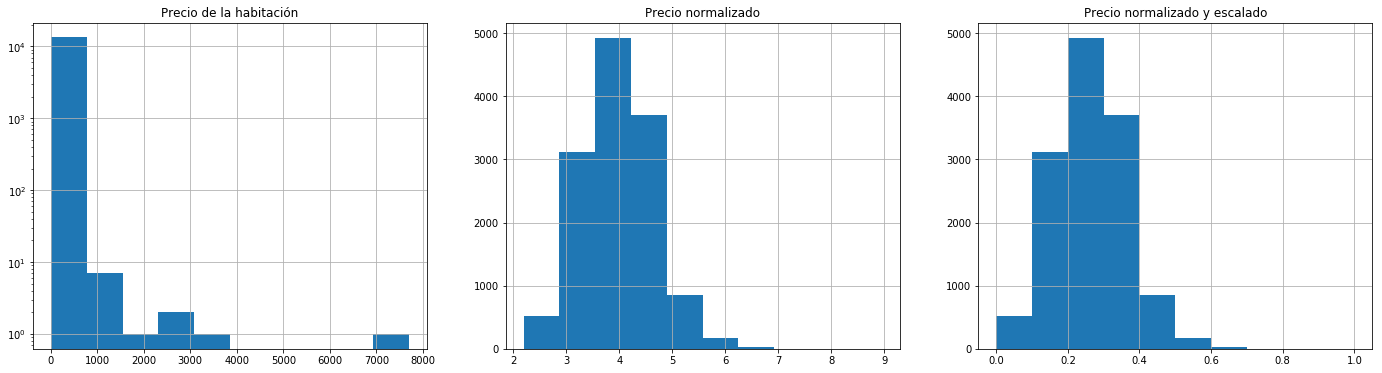

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))
raw_df["price"].hist(ax = ax1)
temp_df["price_norm"] = np.log(raw_df["price"])
temp_df["price_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['price_scaled'] = scaler.fit_transform(temp_df['price_norm'].values.reshape(-1,1))


temp_df["price_scaled"].hist(ax = ax3)
ax1.set_title("Precio de la habitación")
ax2.set_title("Precio normalizado")
ax3.set_title("Precio normalizado y escalado")
ax1.set_yscale("log")

/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Precio normalizado y escalado')

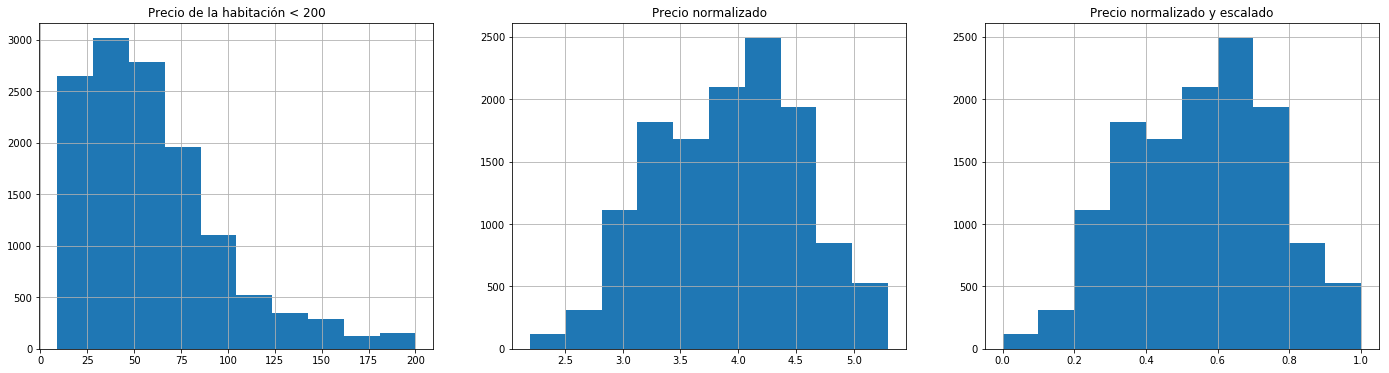

In [45]:
# Seleccionando valores <= 200
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))
selected_df = raw_df.loc[raw_df['price'] <= 200]
selected_df["price"].hist(ax = ax1)
temp_df["price_norm"] = np.log(selected_df["price"])
temp_df["price_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['price_scaled'] = scaler.fit_transform(temp_df['price_norm'].values.reshape(-1,1))


temp_df["price_scaled"].hist(ax = ax3)
ax1.set_title("Precio de la habitación < 200")
ax2.set_title("Precio normalizado")
ax3.set_title("Precio normalizado y escalado")
# ax1.set_yscale("log")

#### minimum_nights

El 97.5% de las muestras están por debajo de 10 noches mínimas para reservar. Es una buena forma de quitar outlayers.

In [40]:
raw_df["minimum_nights"].quantile(.975)

10.0

/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Noches mínimas normalizadas y escaladas')

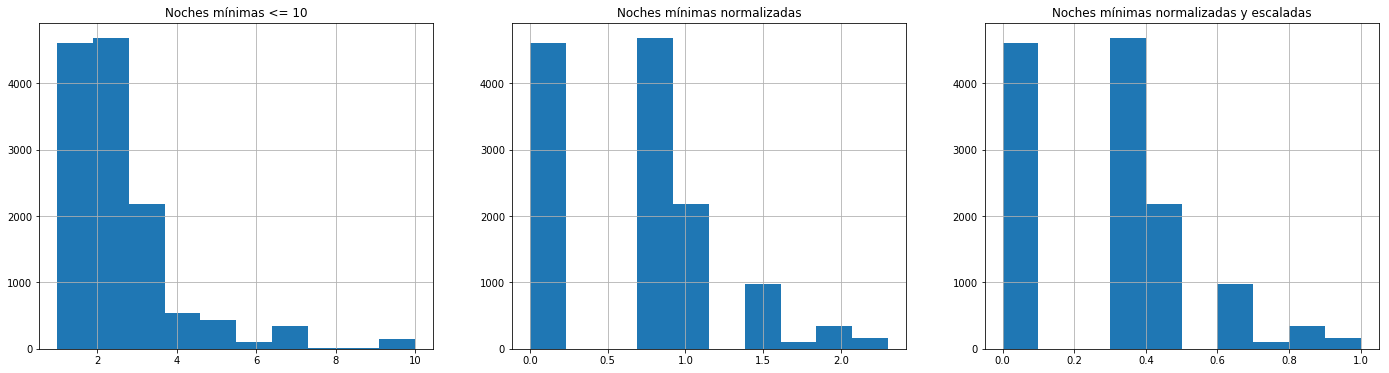

In [48]:
# Seleccionando valores <= 10
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))
selected_df = raw_df.loc[raw_df['minimum_nights'] <= 10]
selected_df["minimum_nights"].hist(ax = ax1)
temp_df["minimum_nights_norm"] = np.log(selected_df["minimum_nights"])
temp_df["minimum_nights_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['minimum_nights_scaled'] = scaler.fit_transform(temp_df['minimum_nights_norm'].values.reshape(-1,1))


temp_df["minimum_nights_scaled"].hist(ax = ax3)
ax1.set_title("Noches mínimas <= 10")
ax2.set_title("Noches mínimas normalizadas")
ax3.set_title("Noches mínimas normalizadas y escaladas")
# ax1.set_yscale("log")

Quizá no haga falta aplicar la escala logarítmica. No parece aportar nada en este caso.

#### number_of_reviews

In [46]:
raw_df["number_of_reviews"].quantile(.975)

136.0

/home/juan/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/juan/.local/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value i

Text(0.5, 1.0, 'Número de opiniones normalizadas y escaladas')

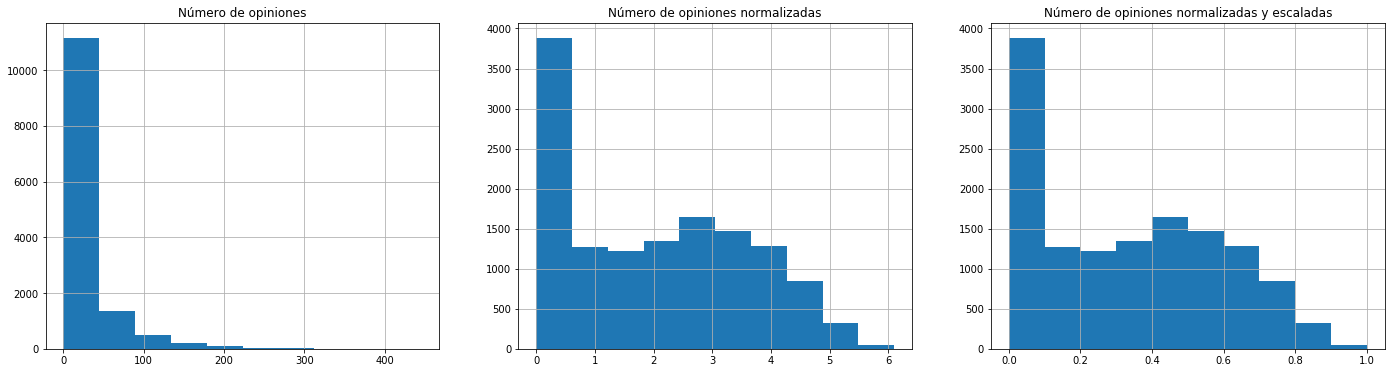

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))
raw_df["number_of_reviews"].hist(ax = ax1)
temp_df["number_of_reviews_norm"] = np.log(raw_df["number_of_reviews"])
temp_df.replace(-np.inf, 0, inplace=True)

temp_df["number_of_reviews_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['number_of_reviews_scaled'] = scaler.fit_transform(temp_df['number_of_reviews_norm'].values.reshape(-1,1))


temp_df["number_of_reviews_scaled"].hist(ax = ax3)
ax1.set_title("Número de opiniones")
ax2.set_title("Número de opiniones normalizadas")
ax3.set_title("Número de opiniones normalizadas y escaladas")

#### reviews_per_month

/home/juan/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/juan/.local/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value i

Text(0.5, 1.0, 'Número de opiniones mensuales normalizadas y escaladas')

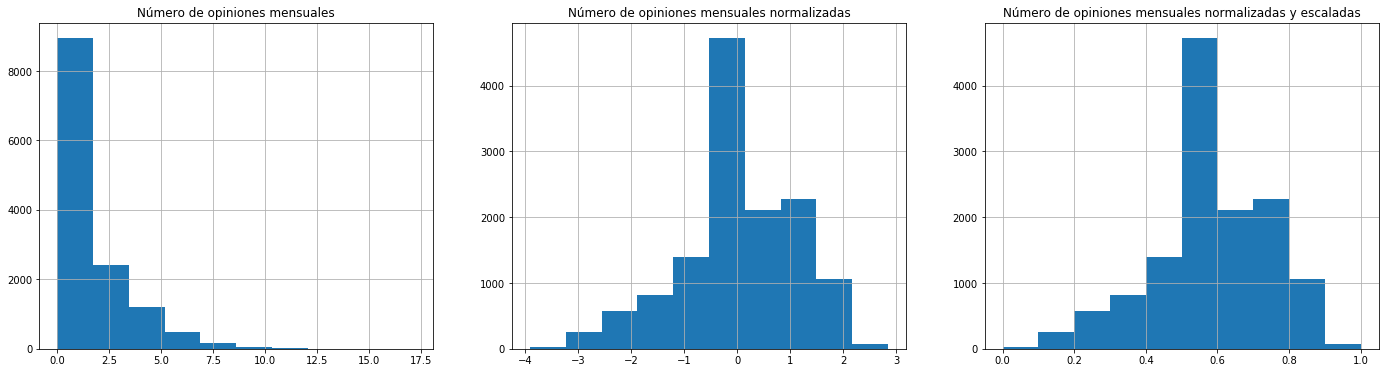

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))
raw_df["reviews_per_month"].hist(ax = ax1)
temp_df["reviews_per_month_norm"] = np.log(raw_df["reviews_per_month"])
temp_df.replace(-np.inf, 0, inplace=True)

temp_df["reviews_per_month_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['reviews_per_month_scaled'] = scaler.fit_transform(temp_df['reviews_per_month_norm'].values.reshape(-1,1))


temp_df["reviews_per_month_scaled"].hist(ax = ax3)
ax1.set_title("Número de opiniones mensuales")
ax2.set_title("Número de opiniones mensuales normalizadas")
ax3.set_title("Número de opiniones mensuales normalizadas y escaladas")

#### calculated_host_listings_count

In [59]:
raw_df["calculated_host_listings_count"].quantile(.975)

67.0

Aunque cortemos en 70 sigue estando muy desbalanceado.

Text(0.5, 1.0, 'Número de alojamientos del vendedor normalizadas y escaladas')

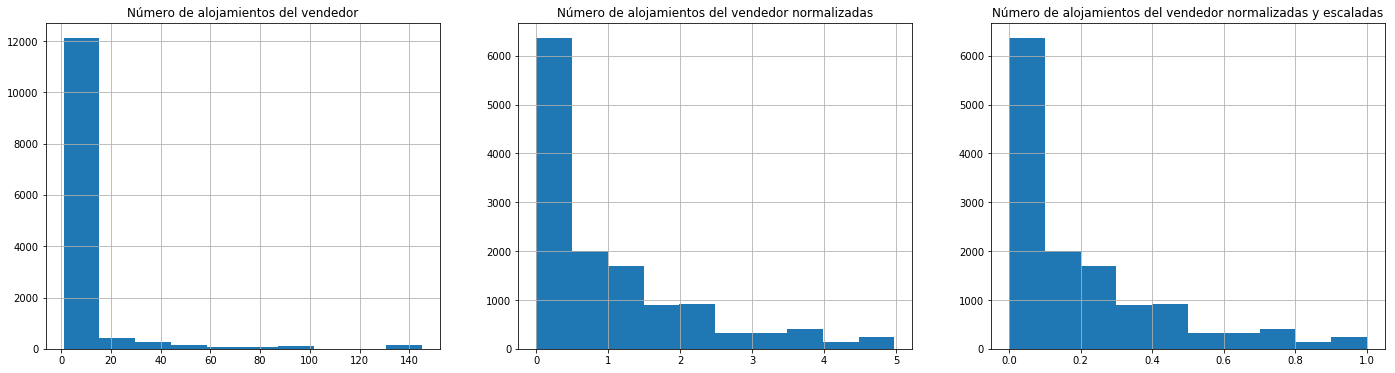

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))

raw_df["calculated_host_listings_count"].hist(ax = ax1)
temp_df["calculated_host_listings_count_norm"] = np.log(raw_df["calculated_host_listings_count"])
temp_df.replace(-np.inf, 0, inplace=True)

temp_df["calculated_host_listings_count_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['calculated_host_listings_count_scaled'] = scaler.fit_transform(temp_df['calculated_host_listings_count_norm'].values.reshape(-1,1))


temp_df["calculated_host_listings_count_scaled"].hist(ax = ax3)
ax1.set_title("Número de alojamientos del vendedor")
ax2.set_title("Número de alojamientos del vendedor normalizadas")
ax3.set_title("Número de alojamientos del vendedor normalizadas y escaladas")

#### availability_365

/home/juan/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Disponibilidad anual del alojamiento normalizada y escalada')

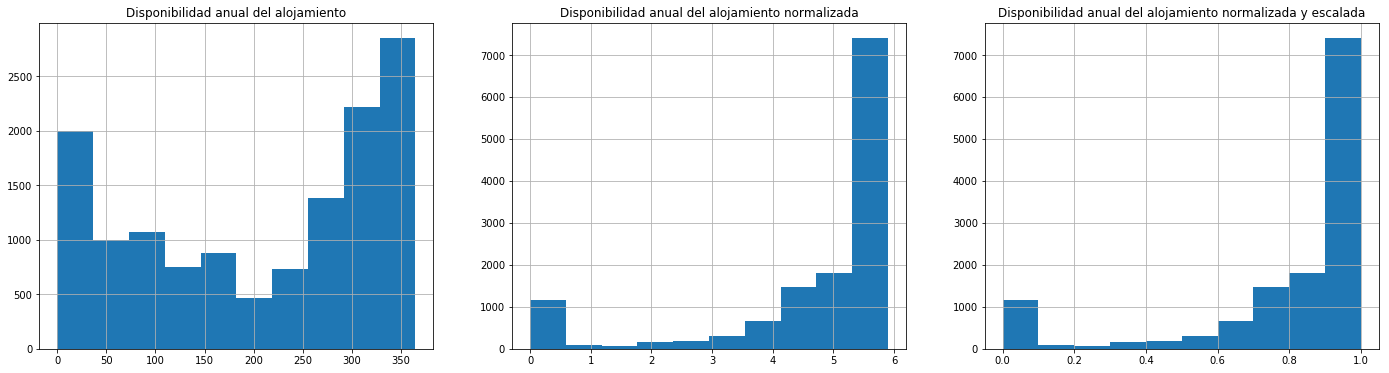

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))

raw_df["availability_365"].hist(ax = ax1)
temp_df["availability_365_norm"] = np.log(raw_df["availability_365"])
temp_df.replace(-np.inf, 0, inplace=True)

temp_df["availability_365_norm"].hist(ax = ax2)

scaler = MinMaxScaler()
temp_df['availability_365_scaled'] = scaler.fit_transform(temp_df['availability_365_norm'].values.reshape(-1,1))


temp_df["availability_365_scaled"].hist(ax = ax3)
ax1.set_title("Disponibilidad anual del alojamiento")
ax2.set_title("Disponibilidad anual del alojamiento normalizada")
ax3.set_title("Disponibilidad anual del alojamiento normalizada y escalada")

Hay muchos alojamientos sin noches disponibles. Puede ser que ya no den servicio o que lleven menos de un año abiertos y aún no haya ese dato. No podemos quitarlos porque nos quedamos sin datos casi. No merece la pena normalizar log.